# 简单线性回归模型

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

以下的简单回归模型估计了两个变量 $x_i$ 和 $y_i$ 之间的关系

$$
y_i = \alpha + \beta x_i + \epsilon_i, i = 1,2,...,N
$$

其中 $\epsilon_i$ 表示最佳拟合线与给定 $x_i$ 的样本值 $y_i$ 之间的误差。

我们的目标是选择 $\alpha$ 和 $\beta$ 的值来为一些适用于变量 $x_i$ 和 $y_i$ 的数据构建一条“最佳”拟合线。

让我们假设存在一个简单的数据集，其中包含 10 个变量 $x_i$ 和 $y_i$ 的观测值：


| | $y_i$  | $x_i$ |
|-|---|---|
|1| 2000 | 32 |
|2| 1000 | 21 | 
|3| 1500 | 24 | 
|4| 2500 | 35 | 
|5| 500 | 10 |
|6| 900 | 11 |
|7| 1100 | 22 | 
|8| 1500 | 21 | 
|9| 1800 | 27 |
|10 | 250 | 2 |

让我们把 $y_i$ 视为一个冰淇淋车的销售额，而 $x_i$ 是记录当天气温（摄氏度）的变量。

In [2]:
x = [32, 21, 24, 35, 10, 11, 22, 21, 27, 2]
y = [2000, 1000, 1500, 2500, 500, 900, 1100, 1500, 1800, 250]
df = pd.DataFrame([x,y]).T
df.columns = ['X', 'Y']
df

,X,Y
0,32,2000
1,21,1000
2,24,1500
3,35,2500
4,10,500
5,11,900
6,22,1100
7,21,1500
8,27,1800
9,2,250


我们可以通过散点图来观察 $y_i$（冰淇淋销售额（美元(\$\'s)）和 $x_i$（摄氏度）之间的关系。

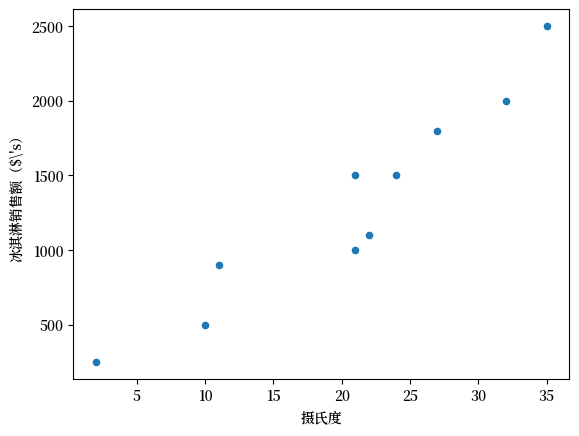

In [3]:
ax = df.plot(
    x='X', 
    y='Y', 
    kind='scatter', 
    ylabel=r'冰淇淋销售额（$\'s）', 
    xlabel='摄氏度'
)

如你所见，数据表明在较热的日子里通常会卖出较多的冰淇淋。

为了构建数据的线性模型，我们需要选择代表“最佳”拟合线的 $\alpha$ 和 $\beta$ 值，使得

$$
\hat{y_i} = \hat{\alpha} + \hat{\beta} x_i
$$

让我们从 $\alpha = 5$ 和 $\beta = 10$ 开始

In [4]:
α = 5
β = 10
df['Y_hat'] = α + β * df['X']

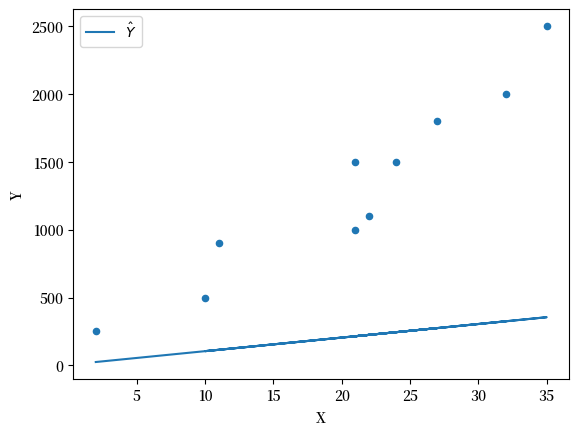

In [5]:
fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
ax = df.plot(x='X',y='Y_hat', kind='line', ax=ax, label=r'$\hat Y$')
plt.show()

我们可以看到这个模型没法很好地估计两者的关系。

我们可以继续猜测，并通过调整参数迭代出一条 “最佳 ”拟合线。

In [6]:
β = 100
df['Y_hat'] = α + β * df['X']

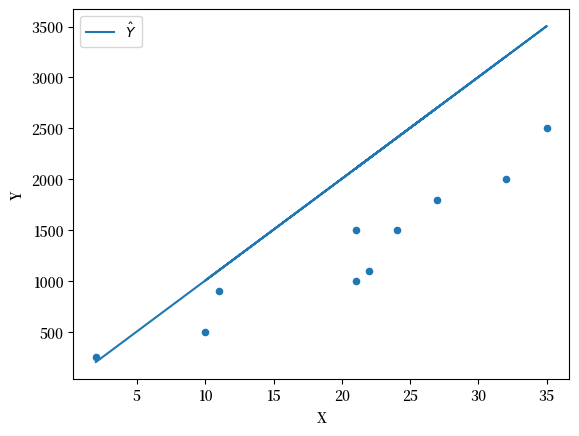

In [7]:
fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
ax = df.plot(x='X',y='Y_hat', kind='line', ax=ax, label=r'$\hat Y$')
plt.show()

In [8]:
β = 65
df['Y_hat'] = α + β * df['X']

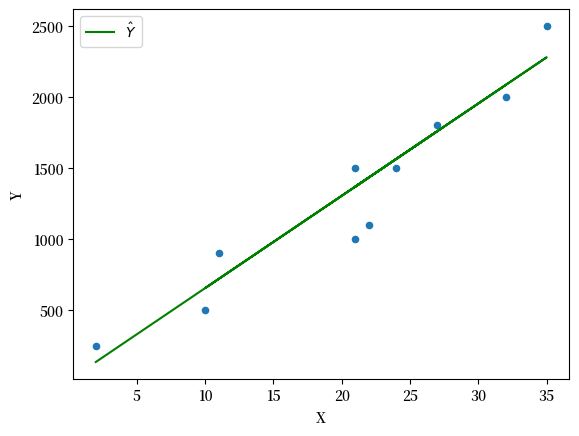

In [9]:
fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
yax = df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g', label=r'$\hat Y$')
plt.show()

与其不断猜测参数值，我们可以把这个问题转化为一个优化问题，用数学方法来求解最优的参数。

为此，我们先来定义一个重要的概念：残差（residual）。残差 $\epsilon_i$ 是实际观测值 $y_i$ 与模型预测值 $\hat{y}_i$ 之间的差异。

$$
\begin{aligned}
\hat{e}_i &= y_i - \hat{y}_i \\
          &= y_i - \hat{\alpha} - \hat{\beta} x_i
\end{aligned}
$$

In [10]:
df['error'] = df['Y_hat'] - df['Y']

In [11]:
df

,X,Y,Y_hat,error
0,32,2000,2085,85
1,21,1000,1370,370
2,24,1500,1565,65
3,35,2500,2280,-220
4,10,500,655,155
5,11,900,720,-180
6,22,1100,1435,335
7,21,1500,1370,-130
8,27,1800,1760,-40
9,2,250,135,-115


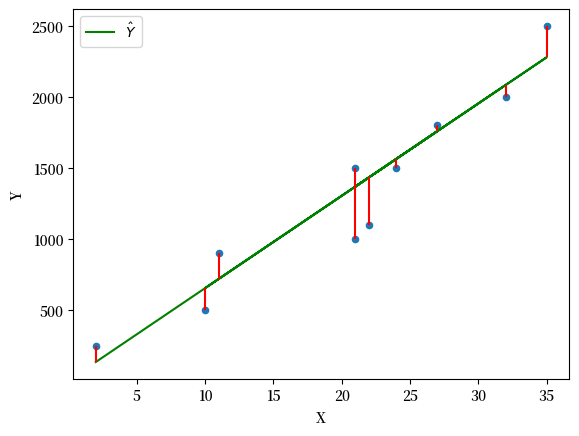

In [12]:
fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
yax = df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g', label=r'$\hat Y$')
plt.vlines(df['X'], df['Y_hat'], df['Y'], color='r')
plt.show()

普通最小二乘方法 (OLS) 通过 **最小化** 残差平方和 (SSR) 来选择 $\alpha$ 和 $\beta$ 的值。

$$
\min_{\alpha,\beta} \sum_{i=1}^{N}{\hat{e}_i^2} = \min_{\alpha,\beta} \sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)^2}
$$

我们称之为成本函数

$$
C = \sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)^2}
$$

我们希望通过调整参数 $\alpha$ 和 $\beta$ 来最小化这个成本函数。

## 残差相对于 $\alpha$ 和 $\beta$ 是如何变化的

首先，我们看看总残差相对于 $\beta$ 的变化（保持截距 $\alpha$ 不变）

我们从[下一节](slr:optimal-values)可以知道 $\alpha$ 和 $\beta$ 的最优值是：

In [13]:
β_optimal = 64.38
α_optimal = -14.72

我们可以计算一系列 $\beta$ 值的残差

In [14]:
errors = {}
for β in np.arange(20,100,0.5):
    errors[β] = abs((α_optimal + β * df['X']) - df['Y']).sum()

绘制残差图

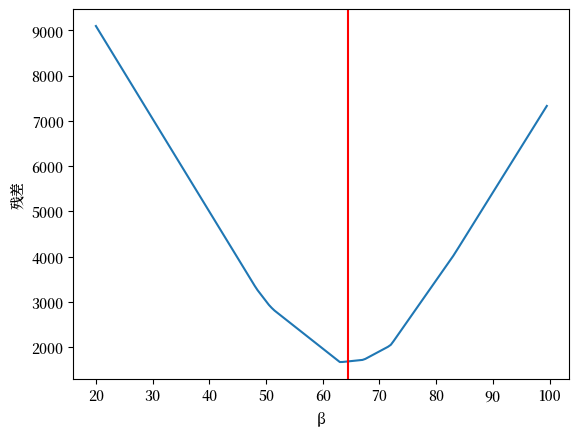

In [15]:
ax = pd.Series(errors).plot(xlabel='β', ylabel='残差')
plt.axvline(β_optimal, color='r');

现在我们改变 $\alpha$ （保持 $\beta$ 不变）

In [16]:
errors = {}
for α in np.arange(-500,500,5):
    errors[α] = abs((α + β_optimal * df['X']) - df['Y']).sum()

绘制残差图

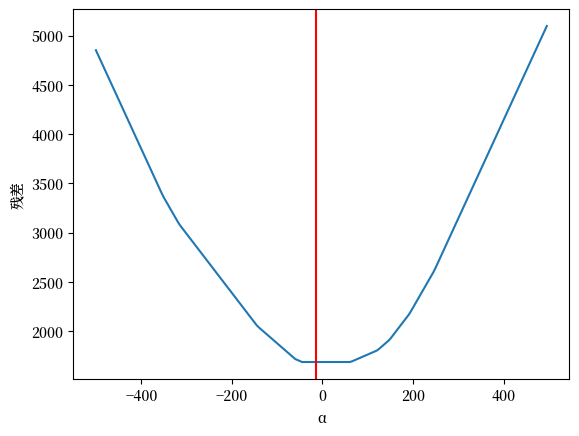

In [17]:
ax = pd.Series(errors).plot(xlabel='α', ylabel='残差')
plt.axvline(α_optimal, color='r');

(slr:optimal-values)=
## 计算最优值

现在让我们使用微积分来解决优化问题，并计算出 $\alpha$ 和 $\beta$ 的最优值，以找到普通最小二乘（OLS）解。

首先对 $\alpha$ 取偏导

$$
\frac{\partial C}{\partial \alpha}[\sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)^2}]
$$

并将其设为 $0$

$$
0 = \sum_{i=1}^{N}{-2(y_i - \alpha - \beta x_i)}
$$

我们可以通过两边除以 $-2$ 来移除求和中的常数 $-2$

$$
0 = \sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)}
$$

现在我们可以将这个方程分解成几个组成部分

$$
0 = \sum_{i=1}^{N}{y_i} - \sum_{i=1}^{N}{\alpha} - \beta \sum_{i=1}^{N}{x_i}
$$

中间项是常数 $\alpha$ 从 $i=1,...N$ 进行直接相加得到的

$$
0 = \sum_{i=1}^{N}{y_i} - N*\alpha - \beta \sum_{i=1}^{N}{x_i}
$$

重新排列各项可得

$$
\alpha = \frac{\sum_{i=1}^{N}{y_i} - \beta \sum_{i=1}^{N}{x_i}}{N}
$$

我们可以发现分解成两个分数后，它们分别是均值 $\bar{y_i}$ 和 $\bar{x_i}$

$$
\alpha = \bar{y_i} - \beta\bar{x_i}
$$ (eq:optimal-alpha)

回到成本函数 $C$ ，现在我们对 $\beta$ 取偏导

$$
\frac{\partial C}{\partial \beta}[\sum_{i=1}^{N}{(y_i - \alpha - \beta x_i)^2}]
$$

并将其设为 $0$

$$
0 = \sum_{i=1}^{N}{-2 x_i (y_i - \alpha - \beta x_i)}
$$

我们可以通过将两边除以 $-2$ ，再次将常数从求和中取出

$$
0 = \sum_{i=1}^{N}{x_i (y_i - \alpha - \beta x_i)}
$$

进一步化简

$$
0 = \sum_{i=1}^{N}{(x_i y_i - \alpha x_i - \beta x_i^2)}
$$

现在代入 $\alpha$

$$
0 = \sum_{i=1}^{N}{(x_i y_i - (\bar{y_i} - \beta \bar{x_i}) x_i - \beta x_i^2)}
$$

重新排列各项

$$
0 = \sum_{i=1}^{N}{(x_i y_i - \bar{y_i} x_i - \beta \bar{x_i} x_i - \beta x_i^2)}
$$

这个方程可以被分成两个求和

$$
0 = \sum_{i=1}^{N}(x_i y_i - \bar{y_i} x_i) + \beta \sum_{i=1}^{N}(\bar{x_i} x_i - x_i^2)
$$

得到 $\beta$ 的解

$$
\beta = \frac{\sum_{i=1}^{N}(x_i y_i - \bar{y_i} x_i)}{\sum_{i=1}^{N}(x_i^2 - \bar{x_i} x_i)}
$$ (eq:optimal-beta)

我们现在可以使用{eq}`eq:optimal-alpha` 和 {eq}`eq:optimal-beta` 来计算$\alpha$和$\beta$的最优值

计算$\beta$

In [18]:
df = df[['X','Y']].copy()  # 原始数据

# 计算样本均值
x_bar = df['X'].mean()
y_bar = df['Y'].mean()

现在我们用10个观察值进行计算，然后把分子和分母分别求和

In [19]:
# 计算求和项
df['num'] = df['X'] * df['Y'] - y_bar * df['X']
df['den'] = pow(df['X'],2) - x_bar * df['X']
β = df['num'].sum() / df['den'].sum()
print(β)

64.37665782493369


计算$\alpha$

In [20]:
α = y_bar - β * x_bar
print(α)

-14.72148541114052


现在我们可以绘制OLS解

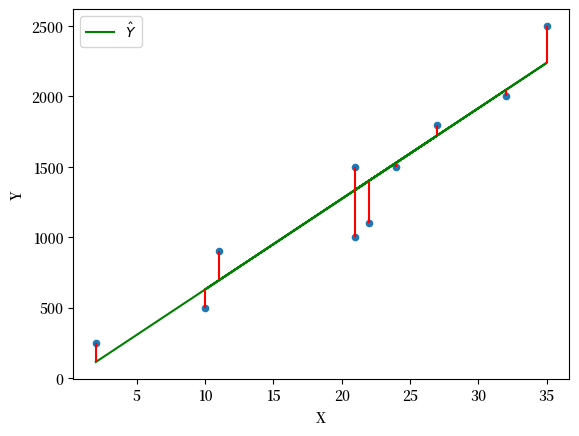

In [21]:
df['Y_hat'] = α + β * df['X']
df['error'] = df['Y_hat'] - df['Y']

fig, ax = plt.subplots()
ax = df.plot(x='X',y='Y', kind='scatter', ax=ax)
yax = df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g', label=r'$\hat Y$')
plt.vlines(df['X'], df['Y_hat'], df['Y'], color='r');

```{exercise}
:label: slr-ex1

现在你已经知道了使用OLS解决简单线性回归模型的方程，你可以开始运行自己的回归来构建$y$和$x$之间的模型了。

让我们考虑两个经济变量，人均GDP和预期寿命。

1. 你认为它们之间的关系会是怎样的？
2. 从[our world in data](https://ourworldindata.org)中搜集一些数据
3. 使用`pandas`导入`csv`格式的数据，并绘制几个不同国家的图表
4. 使用{eq}`eq:optimal-alpha` 和 {eq}`eq:optimal-beta`计算$\alpha$和$\beta$的最优值
5. 使用OLS绘制最佳拟合线
6. 解释系数并用一句话总结人均GDP和预期寿命之间的关系

```

```{solution-start} slr-ex1
:class: dropdown
```

**第2问：** 从[our world in data](https://ourworldindata.org)中搜集一些数据

```{raw} html
<iframe src="https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita" loading="lazy" style="width: 100%; height: 600px; border: 0px none;"></iframe>
```

如果你遇到困难，可以从这里下载{download}`数据副本 <https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/_static/lecture_specific/simple_linear_regression/life-expectancy-vs-gdp-per-capita.csv>`

**第3问：** 使用`pandas`导入`csv`格式的数据并绘制几个感兴趣的国家的图表

In [22]:
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/_static/lecture_specific/simple_linear_regression/life-expectancy-vs-gdp-per-capita.csv"
df = pd.read_csv(data_url, nrows=10)

In [23]:
df

,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.7,1156.0,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,28.0,1170.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,28.4,1189.0,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,28.9,1240.0,NaN,7764549.0,NaN
5,Afghanistan,AFG,1954,29.2,1245.0,NaN,7864289.0,NaN
6,Afghanistan,AFG,1955,29.9,1246.0,NaN,7971933.0,NaN
7,Afghanistan,AFG,1956,30.4,1278.0,NaN,8087730.0,NaN
8,Afghanistan,AFG,1957,30.9,1253.0,NaN,8210207.0,NaN
9,Afghanistan,AFG,1958,31.5,1298.0,NaN,8333827.0,NaN


从Our World in Data下载的数据包含了全球各国的人均GDP和预期寿命数据。

在导入完整数据集之前，我们先看看前几行数据来了解其结构。这样可以帮助我们确定哪些列是我们真正需要的。

我们可以看到数据集中包含了一些不必要的列，比如`Continent`。

让我们选择我们需要的列来创建一个更简洁的数据集：

In [24]:
cols = ['Code', 'Year', 'Life expectancy at birth (historical)', 'GDP per capita']
df = pd.read_csv(data_url, usecols=cols)
df

,Code,Year,Life expectancy at birth (historical),GDP per capita
0,OWID_ABK,2015,NaN,NaN
1,AFG,1950,27.7,1156.0
2,AFG,1951,28.0,1170.0
3,AFG,1952,28.4,1189.0
4,AFG,1953,28.9,1240.0
...,...,...,...,...
62151,ZWE,1946,NaN,NaN
62152,ZWE,1947,NaN,NaN
62153,ZWE,1948,NaN,NaN
62154,ZWE,1949,NaN,NaN


有时候重命名列名可以让我们在DataFrame中更方便进行操作

In [25]:
df.columns = ["cntry", "year", "life_expectancy", "gdppc"]
df

,cntry,year,life_expectancy,gdppc
0,OWID_ABK,2015,NaN,NaN
1,AFG,1950,27.7,1156.0
2,AFG,1951,28.0,1170.0
3,AFG,1952,28.4,1189.0
4,AFG,1953,28.9,1240.0
...,...,...,...,...
62151,ZWE,1946,NaN,NaN
62152,ZWE,1947,NaN,NaN
62153,ZWE,1948,NaN,NaN
62154,ZWE,1949,NaN,NaN


我们可以看到存在`NaN`值，这表示缺失数据，所以让我们继续删除这些数据

In [26]:
df.dropna(inplace=True)

In [27]:
df

,cntry,year,life_expectancy,gdppc
1,AFG,1950,27.7,1156.0000
2,AFG,1951,28.0,1170.0000
3,AFG,1952,28.4,1189.0000
4,AFG,1953,28.9,1240.0000
5,AFG,1954,29.2,1245.0000
...,...,...,...,...
61960,ZWE,2014,58.8,1594.0000
61961,ZWE,2015,59.6,1560.0000
61962,ZWE,2016,60.3,1534.0000
61963,ZWE,2017,60.7,1582.3662


通过删除缺失值，我们的数据集从62156行减少到了12445行。

现在我们有了一个清理过的数据集，包含了不同国家在不同年份的预期寿命和人均GDP数据。

在进行任何分析之前，我们应该先仔细了解数据的特点。一个重要的问题是: 不同国家在不同时期的数据是否完整?

让我们先来看看预期寿命数据的分布情况

In [28]:
le_years = df[['cntry', 'year', 'life_expectancy']].set_index(['cntry', 'year']).unstack()['life_expectancy']
le_years

year,1543,1548,1553,1558,1563,1568,1573,1578,1583,1588,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cntry,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.4,60.9,61.4,61.9,62.4,62.5,62.7,63.1,63.0,63.1
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.8,56.7,57.6,58.6,59.3,60.0,60.7,61.1,61.7,62.1
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.8,77.9,78.1,78.1,78.1,78.4,78.6,78.9,79.0,79.2
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,78.3,78.5,78.7,78.9,79.0,79.2,79.3,79.5,79.6
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.9,75.7,76.1,76.5,76.5,76.8,76.8,76.3,76.8,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.5,73.5,73.7,73.7,73.8,73.9,73.9,73.9,74.0,74.0
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.2,67.3,67.4,67.3,67.5,67.4,65.9,66.1,66.0,64.6
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.4,58.9,60.7,61.8,62.5,63.4,63.9,64.7,65.4,65.7


如你所见，有很多国家在1543年的数据是不可用的！

哪个国家报告了这些数据？

In [29]:
le_years[~le_years[1543].isna()]

year,1543,1548,1553,1558,1563,1568,1573,1578,1583,1588,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cntry,,,,,,,,,,,,,,,,,,,,,
GBR,33.94,38.82,39.59,22.38,36.66,39.67,41.06,41.56,42.7,37.05,...,80.2,80.4,80.8,80.9,80.9,81.2,80.9,81.1,81.2,81.1


你可以看到，只有大不列颠（GBR）的数据是可用的

你还可以更仔细地观察时间序列，发现即使对于GBR，它也是不连续的。

<Axes: xlabel='年份'>

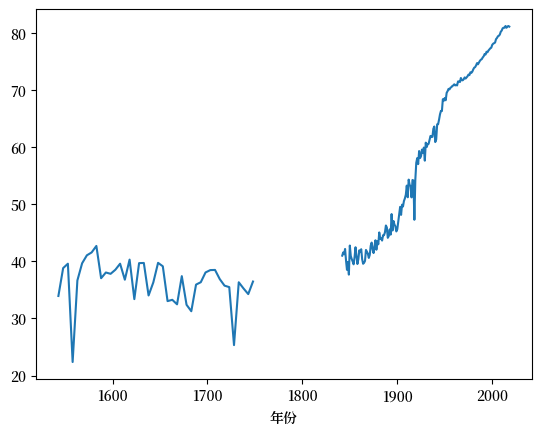

In [30]:
le_years.loc['GBR'].plot(xlabel="年份")

实际上我们可以使用pandas快速检查每个年份涵盖了多少个国家

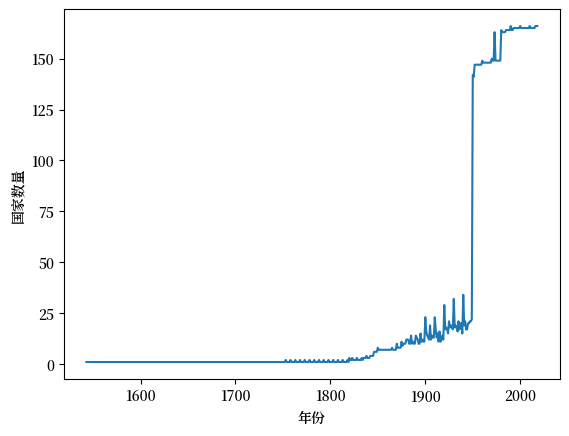

In [31]:
le_years.stack().unstack(level=0).count(axis=1).plot(xlabel="年份", ylabel="国家数量");

所以很明显，如果你进行横断面比较，那么最近的数据将包括更广泛的国家

现在让我们考虑数据集中最近的一年，也就是2018

In [32]:
df = df[df.year == 2018].reset_index(drop=True).copy()

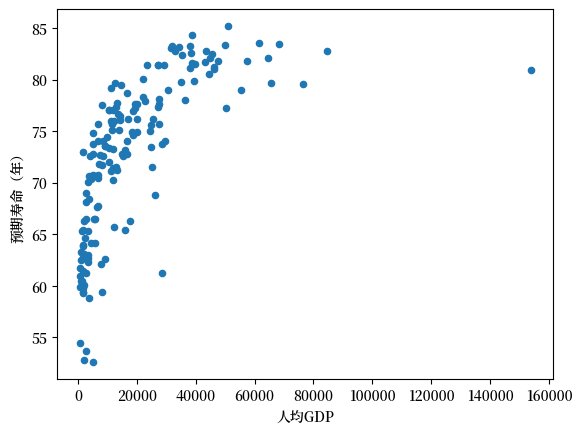

In [33]:
df.plot(x='gdppc', y='life_expectancy', kind='scatter', xlabel="人均GDP", ylabel="预期寿命（年）",);

这些数据显示了一些有趣的关系。

1. 许多国家的人均GDP相近，但预期寿命差别很大
2. 人均GDP与预期寿命之间似乎存在正向关系。人均GDP较高的国家往往拥有更高的预期寿命

虽然普通最小二乘法（OLS）主要用于线性关系，但我们可以通过对变量进行适当的转换（比如取对数），使非线性关系转化为线性关系，从而仍然可以使用OLS方法。

通过指定 `logx` 你可以在对数尺度上绘制人均GDP数据

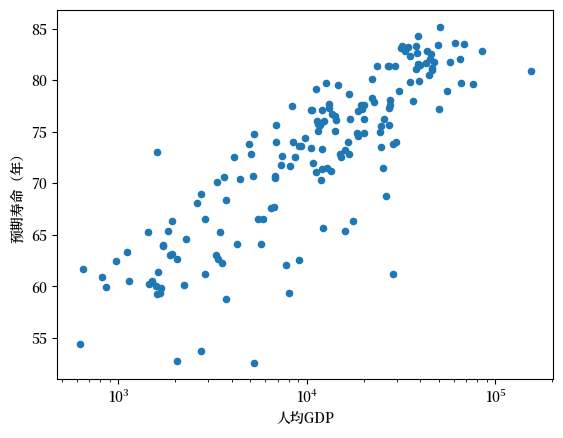

In [34]:
df.plot(x='gdppc', y='life_expectancy', kind='scatter',  xlabel="人均GDP", ylabel="预期寿命（年）", logx=True);

从这次转换可以看出，线性模型更贴近数据的形状。

In [35]:
df['log_gdppc'] = df['gdppc'].apply(np.log10)

In [36]:
df

,cntry,year,life_expectancy,gdppc,log_gdppc
0,AFG,2018,63.1,1934.5550,3.286581
1,ALB,2018,79.2,11104.1660,4.045486
2,DZA,2018,76.1,14228.0250,4.153145
3,AGO,2018,62.1,7771.4420,3.890502
4,ARG,2018,77.0,18556.3830,4.268493
...,...,...,...,...,...
161,VNM,2018,74.0,6814.1420,3.833411
162,OWID_WRL,2018,72.6,15212.4150,4.182198
163,YEM,2018,64.6,2284.8900,3.358865
164,ZMB,2018,62.3,3534.0337,3.548271


**第4问:** 使用 {eq}`eq:optimal-alpha` 和 {eq}`eq:optimal-beta` 来计算  $\alpha$ 和 $\beta$ 的最优值

In [37]:
data = df[['log_gdppc', 'life_expectancy']].copy()  # 从DataFrame中提取数据

# 计算样本均值
x_bar = data['log_gdppc'].mean()
y_bar = data['life_expectancy'].mean()

In [38]:
data

,log_gdppc,life_expectancy
0,3.286581,63.1
1,4.045486,79.2
2,4.153145,76.1
3,3.890502,62.1
4,4.268493,77.0
...,...,...
161,3.833411,74.0
162,4.182198,72.6
163,3.358865,64.6
164,3.548271,62.3


In [39]:
# 计算求和
data['num'] = data['log_gdppc'] * data['life_expectancy'] - y_bar * data['log_gdppc']
data['den'] = pow(data['log_gdppc'],2) - x_bar * data['log_gdppc']
β = data['num'].sum() / data['den'].sum()
print(β)

12.643730292819708


In [40]:
α = y_bar - β * x_bar
print(α)

21.70209670138904


**第5问:** 绘制使用 OLS 找到的最佳拟合线

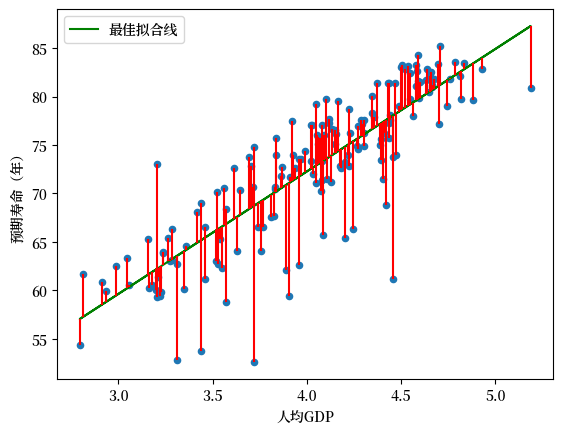

In [41]:
data['life_expectancy_hat'] = α + β * df['log_gdppc']
data['error'] = data['life_expectancy_hat'] - data['life_expectancy']

fig, ax = plt.subplots()
data.plot(x='log_gdppc',y='life_expectancy', kind='scatter', ax=ax, xlabel="人均GDP", ylabel="预期寿命（年）")
data.plot(x='log_gdppc',y='life_expectancy_hat', kind='line', ax=ax, color='g', xlabel="人均GDP", label="最佳拟合线")
plt.vlines(data['log_gdppc'], data['life_expectancy_hat'], data['life_expectancy'], color='r')

```{solution-end}
```

```{exercise}
:label: slr-ex2

最小化平方和并不是生成最佳拟合线的 **唯一** 方法。

举个例子，我们还可以考虑最小化 **绝对值** 之和，这样可以减少对异常值的权重。

使用最小绝对值法求解 $\alpha$ 和 $\beta$ 
```